In [264]:
import os
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

def db_engine():
    host = os.environ.get("DB_PATH")
    port = os.environ.get("DB_PORT")
    user = os.environ.get("DB_USERNAME")
    password = os.environ.get("DB_PASSWORD")
    db = os.environ.get("DB_NAME")
    print(f"postgresql://{user}:***@{host}:{port}/{db}")
    return sqlalchemy.create_engine(f"postgresql://{user}:{password}@{host}:{port}/{db}")


def plot_percent_null(percent_missing, title=""):

    if percent_missing.size == 0:
        return
    
    f, ax = plt.subplots(figsize=(8, 4))
    for i,item in enumerate(zip(percent_missing.keys(),percent_missing.values)):
        ax.bar(item[0], height=item[1], width=0.5, label = item[0])
        if percent_missing.size > 1:
            ax.text(i - 0.2, item[1] + 1.5 , str(np.round(item[1],2)) + " %")
        else:
            ax.text(i - 0.05, item[1] + 1.5 , str(np.round(item[1],2)) + " %")
            ax.set_xlim(-0.5,0.5)

    ax.set_xticklabels([])
    ax.set_xticks([]) 
    plt.ylim(0,100)
    plt.ylabel('Percentage of Missing Values')
    plt.xlabel('Columns')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
import pandas.io.sql as psql

engine = db_engine()
df_users = psql.read_sql_query('SELECT * FROM usr.users', engine)
df_creditcards = psql.read_sql_query('SELECT * FROM usr.creditcards', engine)

df_listings = psql.read_sql_query('SELECT * FROM li.listings', engine)

df_orders = psql.read_sql_query('SELECT * FROM op.Orders', engine)
df_ordersitems = psql.read_sql_query('SELECT * FROM op.OrderItems', engine)
df_ordershipments = psql.read_sql_query('SELECT * FROM op.OrderShipments', engine)

df_items = psql.read_sql_query('SELECT * FROM im.Items', engine)

df_customerservicerequests = psql.read_sql_query('SELECT * FROM cs.CustomerServiceRequests', engine)


In [294]:
df = df_customerservicerequests

print(df.shape)
print(df.info())
df.isnull().mean().round(4)

(29, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29 non-null     int64  
 1   userid         29 non-null     int64  
 2   firstname      29 non-null     object 
 3   lastname       29 non-null     object 
 4   contactreason  29 non-null     object 
 5   email          25 non-null     object 
 6   phone          20 non-null     object 
 7   orderid        25 non-null     float64
 8   resolution     29 non-null     object 
 9   contactmethod  29 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.4+ KB
None


id               0.0000
userid           0.0000
firstname        0.0000
lastname         0.0000
contactreason    0.0000
email            0.1379
phone            0.3103
orderid          0.1379
resolution       0.0000
contactmethod    0.0000
dtype: float64

In [295]:
df.duplicated().any()

False

In [296]:
df.isna().any()

id               False
userid           False
firstname        False
lastname         False
contactreason    False
email             True
phone             True
orderid           True
resolution       False
contactmethod    False
dtype: bool

In [303]:

df[df['orderid'].isna()]

,id,userid,firstname,lastname,contactreason,email,phone,orderid,resolution,contactmethod
3,644088,40952,Britney,Mcfadin,Technical Support,britney.mcfadin@gmail.com,None,NaN,Provided Information,Email
11,730713,4069,Kitty,Goodspeed,Technical Support,kitty.goodspeed@xfinity.com,None,NaN,Provided Information,Email
20,426981,74000,Sdasia,Kazavi,Shipping Delay,stasia.kazabi@yahoo.com,(662) 580-6320,NaN,Provided Information,Phone
21,259904,29694,Daina,Harlimg,Return,daina.harling@fakeemail.com,(890) 333-1976,NaN,Issued Refund,Phone


In [293]:
df.itemstatus.unique()

array(['approved', 'listed', 'sold', None], dtype=object)

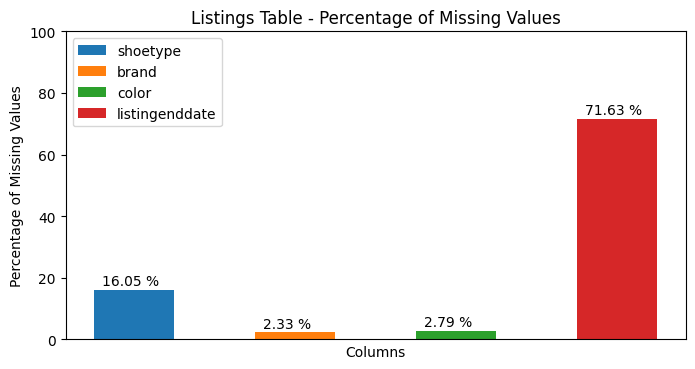

In [266]:
# plot percentage of missing values for Listings table
percent_missing = df_listings.isnull().mean().round(4) * 100
percent_missing = percent_missing[percent_missing!=0]
plot_percent_null(percent_missing, "Listings Table - Percentage of Missing Values")

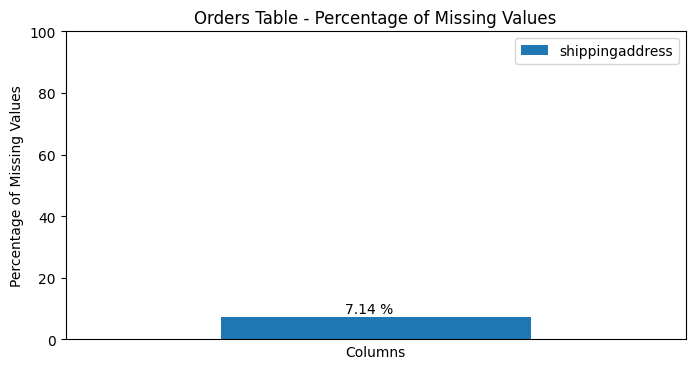

In [268]:
# plot percentage of missing values for Orders table
percent_missing = df_orders.isnull().mean().round(4) * 100
percent_missing = percent_missing[percent_missing!=0]

plot_percent_null(percent_missing, "Orders Table - Percentage of Missing Values")

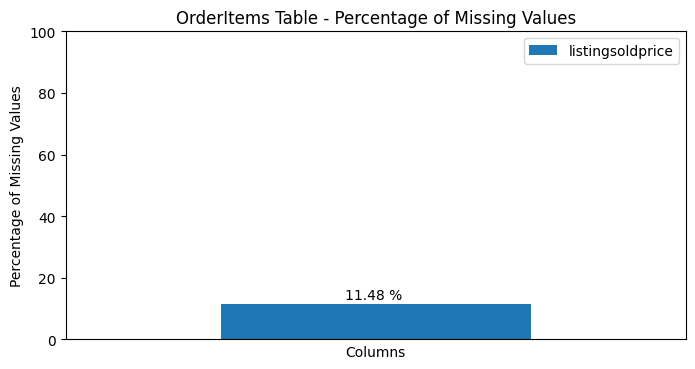

In [274]:
# plot percentage of missing values for OrderItems table
percent_missing = df_ordersitems.isnull().mean().round(4) * 100
percent_missing = percent_missing[percent_missing!=0]

plot_percent_null(percent_missing, "OrderItems Table - Percentage of Missing Values")


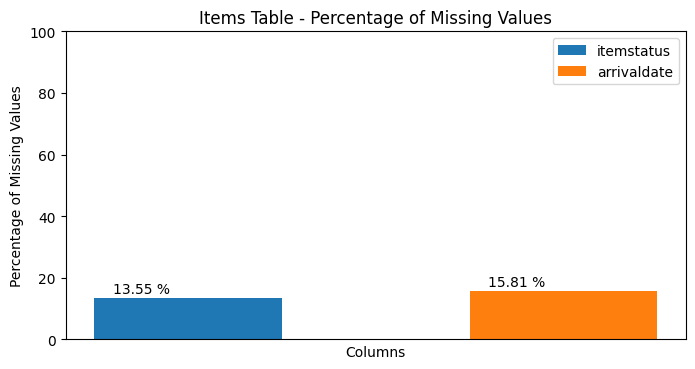

In [288]:
# plot percentage of missing values for Items table
percent_missing = df_items.isnull().mean().round(4) * 100
percent_missing = percent_missing[percent_missing!=0]

plot_percent_null(percent_missing, "Items Table - Percentage of Missing Values")

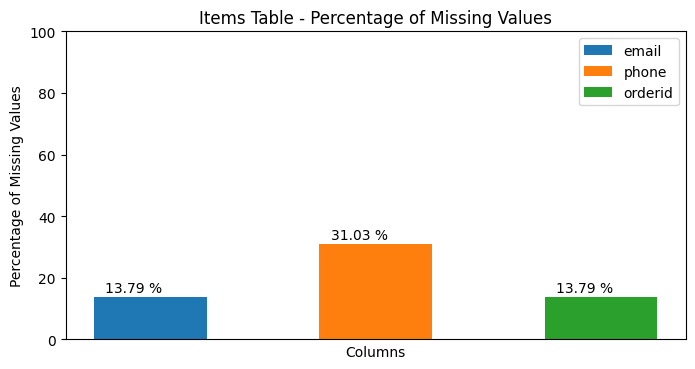

In [298]:
# plot percentage of missing values for Items table
percent_missing = df_customerservicerequests.isnull().mean().round(4) * 100
percent_missing = percent_missing[percent_missing!=0]

plot_percent_null(percent_missing, "Items Table - Percentage of Missing Values")